In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import pandas_profiling as pdp
import scipy.stats as stats
from exploration_utils.plot_utils import category_count_per_label_subplots
from transformation_utils.transformers import VersionToNum, SplitFeature
import seaborn as sns

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline
plt.style.use('dark_background')

In [3]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
# Reading the whole file is extremely slow
# train_df= pd.read_csv(r'/home/raz1/Desktop/DS/Projects/MicrosoftChallenge/microsoft-malware-prediction/train.csv',
#                       dtype = dtypes)

# traindf = pd.read_csv(
#          r'/home/raz1/DS Projects/MicrosoftChallenge/data/train.csv',
#          dtype = dtypes,
#          header=0, 
#          skiprows=lambda i: i>0 and random.random() > 0.005)
# 
# traindf.to_csv(r'/home/raz1/DS Projects/MicrosoftChallenge/data/trainSample.csv',index=False)

#For a faster file load:

traindf = pd.read_csv(r'/home/raz1/DS Projects/MicrosoftChallenge/data/trainSample.csv',dtype = dtypes, header=0)

In [5]:
traindf.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,000153ac9f764dc83842d926a25c29bb,win8defender,1.1.15200.1,4.18.1807.18075,1.275.410.0,0,7.0,0,NaN,53447.0,...,40129.0,1,NaN,0.0,0,0,0.0,0.0,10.0,0
1,0008069b12fd5bcdef3193c128409761,win8defender,1.1.13504.0,4.11.15063.0,1.237.0.0,0,7.0,0,2182.0,49480.0,...,56711.0,1,NaN,0.0,0,0,0.0,0.0,3.0,0
2,00082ed511d0f4cc38e5dca803af5fc3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1112.0,0,7.0,0,NaN,53447.0,...,35257.0,0,NaN,0.0,0,1,0.0,1.0,15.0,1
3,0009612be5cadc8b84d2138f93d4ac6f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.836.0,0,7.0,0,NaN,53447.0,...,7663.0,0,NaN,0.0,0,0,0.0,NaN,NaN,1
4,0009a7e8f5840743347bee76917da78a,win8defender,1.1.15100.1,4.18.1807.18075,1.273.989.0,0,7.0,0,NaN,53447.0,...,60616.0,1,NaN,0.0,1,1,1.0,0.0,10.0,0


In [6]:
yellow_features = ['Platform',
'Processor',
'OsVer', 
'OsBuild',
'OsSuite',
'OsPlatformSubRelease',
'OsBuildLab',
'SkuEdition',
'Census_OSVersion',
'Census_OSArchitecture',
'Census_OSBranch',
'Census_OSBuildNumber',
'Census_OSBuildRevision',
'Census_OSEdition',
'Census_OSSkuName']

In [7]:
# profie = pdp.ProfileReport(traindf[yellow_features])
#  
# profie.to_file(outputfile = 'YellowFeatures_Report_General.html')
# 
# profile_detections = pdp.ProfileReport(traindf[traindf.HasDetections == 1][yellow_features])
# profile_detections.to_file(outputfile = 'YellowFeatures_Report_HasDetections==1.html')
# profile_nodetections = pdp.ProfileReport(traindf[traindf.HasDetections == 0][yellow_features])
# profile_nodetections.to_file(outputfile = 'YellowFeatures_Report_HasDetections==0.html')


Take a view at what a row of yellow_features looks like:

In [8]:
traindf[yellow_features].loc[0]  

Platform                                                 windows10
Processor                                                      x64
OsVer                                                     10.0.0.0
OsBuild                                                      17134
OsSuite                                                        768
OsPlatformSubRelease                                           rs4
OsBuildLab                17134.1.amd64fre.rs4_release.180410-1804
SkuEdition                                                    Home
Census_OSVersion                                    10.0.17134.165
Census_OSArchitecture                                        amd64
Census_OSBranch                                        rs4_release
Census_OSBuildNumber                                         17134
Census_OSBuildRevision                                         165
Census_OSEdition                                CoreSingleLanguage
Census_OSSkuName                               CORE_SINGLELANG

Several things to note/check:

1) Is there any difference between Census_OSEdition and Census_OSSkuName?

2) OsBuild vs Census_OSBuildNumber?

3) Is the first argument of OsVer always identical to the first argument of Census_OSVersion?

4) OsVer, Census_OSVersion format consistency - may be better to convert to a either a numeric feature or 4 different 
features.

5) OsBuildLab format - its actually called BuildLabEx in the windows registry at 
Computer\HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Windows NT\CurrentVersion.
For example, on my very own Laptop - 18362.1.amd64fre.19h1_release.190318-1202.

More information on https://superuser.com/questions/955557/what-is-a-windows-build-string-and-how-to-locate-it 

Start off with 1:

In [25]:
def print_unique_vals(df,feature):
    print('Unique {0} values:\n{1}'.format(feature,df[feature].unique()))

In [26]:
print_unique_vals(traindf,'Census_OSEdition')
print_unique_vals(traindf,'Census_OSSkuName')

Unique Census_OSEdition values:
[CoreSingleLanguage, Professional, Core, CoreCountrySpecific, ProfessionalEducation, ..., ServerDatacenterEval, EducationN, ServerSolution, EnterpriseN, ProfessionalEducationN]
Length: 19
Categories (19, object): [CoreSingleLanguage, Professional, Core, CoreCountrySpecific, ..., EducationN, ServerSolution, EnterpriseN, ProfessionalEducationN]
Unique Census_OSSkuName values:
[CORE_SINGLELANGUAGE, PROFESSIONAL, CORE, CORE_COUNTRYSPECIFIC, ENTERPRISE, ..., STANDARD_EVALUATION_SERVER, DATACENTER_EVALUATION_SERVER, EDUCATION_N, SB_SOLUTION_SERVER, ENTERPRISE_N]
Length: 17
Categories (17, object): [CORE_SINGLELANGUAGE, PROFESSIONAL, CORE, CORE_COUNTRYSPECIFIC, ..., DATACENTER_EVALUATION_SERVER, EDUCATION_N, SB_SOLUTION_SERVER, ENTERPRISE_N]


In [27]:
upperCensus_OSEdition = traindf['Census_OSEdition'].apply(lambda x: x.upper())
upperCensus_OSEdition_str = traindf['Census_OSEdition'].apply(lambda x: x.upper()).astype(str)

Census_OSSkuName_clean_str = traindf['Census_OSSkuName'].astype(str).apply(lambda x: x.replace('_',''))

OSEdition_OSSkuName_comparison = (upperCensus_OSEdition_str == Census_OSSkuName_clean_str)

print('The percentage of equal values between Census_OSEdition and Census_OSSkuName is {0}'
      .format(OSEdition_OSSkuName_comparison.mean()))

The percentage of equal values between Census_OSEdition and Census_OSSkuName is 0.9920741236883233


Whats the difference?

In [ ]:
What about OsBuild vs Census_OSBuildNumber?

In [18]:
(traindf['OsBuild'] == traindf['Census_OSBuildNumber']).mean()

0.9511274838133512

Staggering! nearly identical.

Onwards to 3 - Is the first argument of OsVer always identical to the first argument of Census_OSVersion?

In [25]:
OsVer_firstarg = traindf['OsVer'].apply(lambda x: x.split('.')[0])
Census_OSVersion_firstarg = traindf['Census_OSVersion'].apply(lambda x: x.split('.')[0])
OsVer_CensusOSVersion_comparison = (OsVer_firstarg == Census_OSVersion_firstarg)

print('The percentage of equal first arguments of OsVer and Census_OSVersion is {0}'
      .format(OsVer_CensusOSVersion_comparison.mean()))

The percentage of equal first arguments of OsVer and Census_OSVersion is 0.9683183856502242


Not exactly... What's behind this falsified hypothesis?

In [26]:
print('OsVer summary counts:')
display(traindf.groupby('OsVer').count().MachineIdentifier)
print('\nCensus_OSVersion summary data:')
display(traindf.groupby('Census_OSVersion').count().MachineIdentifier)

OsVer summary counts:

Census_OSVersion summary data:


OsVer
10.0.0.0    43184
6.1.1.0       447
6.3.0.0       965
10.0.3.0        3
6.3.3.0         1
Name: MachineIdentifier, dtype: int64

Census_OSVersion
10.0.10240.16384    143
10.0.10240.16397      3
10.0.10240.16405     43
10.0.10240.16445      3
10.0.10240.16463      5
                   ... 
10.0.17677.1000       1
10.0.18242.1000       2
10.0.10240.16393      1
10.0.16299.0          1
10.0.17761.1          1
Name: MachineIdentifier, Length: 237, dtype: int64

Comparing versions like that can get messy. 

Versions represents how progressed/fixed a program is and can be used as both a timeline and a representation of
potential problematic versions. 

Therefore it makes sense to convert them to a numeric format.
Check the maximum lengths of numbers in each version format: 

In [27]:
vtn = VersionToNum(version_column='OsVer')
transformed_osver = vtn.fit_transform(traindf)

vtncensus = VersionToNum(version_column='Census_OSVersion')
transformed_census_osversion = vtncensus.fit_transform(traindf) 

Split OsBuildLab to several features according to the following format:

Need to carefully check each argument of buildlab.

[OsBuild in 0.999 cases].[Magic Number/OsBuild Subversion].[Census_OSArchitecture+'fre' in 0.998 cases].[Census_OSBranch in 0.883 cases].[Date-Time]

In [23]:
traindf['OsPlatformSubRelease'].unique()

[rs2, rs4, rs3, windows8.1, rs1, th2, th1, windows7, prers5]
Categories (9, object): [rs2, rs4, rs3, windows8.1, ..., th2, th1, windows7, prers5]

In [ ]:
traindf[[col for col in traindf.columns if str(traindf[col].dtype) == 'category']].head()

In [73]:
traindf['Census_OSArchitecture'].unique()

KeyError: 'Census_OsArchitecture'

In [16]:
OsBuildLab_SplitList = ['major','minor', 'build', 'subversion','architecture', 'branch','date','time']
sf = SplitFeature(combined_feature = 'OsBuildLab', split_string='.', new_features_list=OsBuildLab_SplitList)
transformed_traindf = sf.fit_transform(traindf.loc[:5])

NameError: name 'SplitFeature' is not defined

In [ ]:
traindf[yellow_features].dtypes

In [ ]:
[feature for feature in yellow_features if str(traindf[feature].dtype) in ['int16','int32','int64']]

In [ ]:
numeric_yellow_features = [feature for feature in yellow_features 
                           if str(traindf[feature].dtype) in ['int16','int32','int64']]

category_yellow_features = [feature for feature in yellow_features 
                           if str(traindf[feature].dtype)=='category']

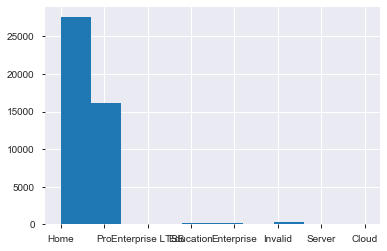

In [48]:
traindf['SkuEdition'].hist()

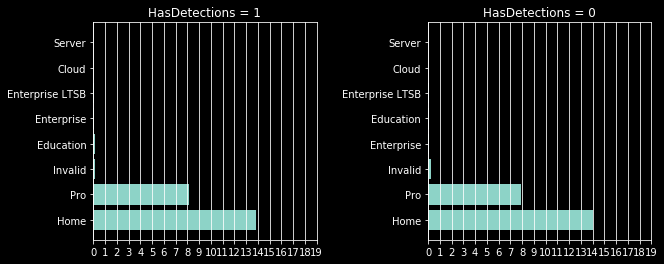

In [11]:
ticks=[1000*i for i in range(20)]
ticklabels=[i for i in range(20)]
category_count_per_label_subplots(df=traindf, category_feature_name='SkuEdition', 
                                             label_feature_name='HasDetections',
                                             nrows=1, ncols=2, figsize=(10,4), wspace=0.5, 
                                             ticks=ticks, ticklabels=ticklabels)

In [12]:
traindf['SkuHome'] = (traindf['SkuEdition'] == 'Home')*1

In [13]:
stats.ttest_ind(traindf[traindf['HasDetections'] == 0].SkuHome,traindf[traindf['HasDetections'] == 1].SkuHome)

Ttest_indResult(statistic=1.2857898802301122, pvalue=0.19852304387711356)

In [14]:
yellow_features.remove('SkuEdition')
yellow_features.append('SkuHome')

In [15]:
corrs = traindf[yellow_features].corr()

In [16]:
traindf[['OsBuild','Census_OSBuildNumber']].corr()

,OsBuild,Census_OSBuildNumber
OsBuild,1.000000,0.937349
Census_OSBuildNumber,0.937349,1.000000


In [17]:
traindf[['OsBuild','Census_OSBuildNumber']].plot(kind='scatter')

ValueError: scatter requires an x and y column